<a href="https://colab.research.google.com/github/kunal-git-002/CNN/blob/master/CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CNN fashion mnist***

***28x28,10 class,60000 for training,10000 for testing***

**classes :** 0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Convolution2D,MaxPooling2D

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(x_tr,y_tr),(x_te,y_te)=fashion_mnist.load_data()

In [ ]:
y_tr

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names=["t_shirt/top",
             "trouser",
             "pullover",
             "dress",
             "coat",
             "sandal",
             "shirt",
             "sneaker",
             "bag",
             "ankle boot"]

In [ ]:
class_names[9]

'ankle boot'

***visulize the img***

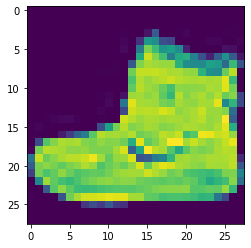

In [ ]:
plt.figure()
plt.imshow(x_tr[0])
plt.show()
#plt.gca().grid(False)


In [ ]:
#convert 0-255 to 0-1
x_tr=x_tr/255.0
x_te=x_te/255.0

***visulize first 25 imgs***

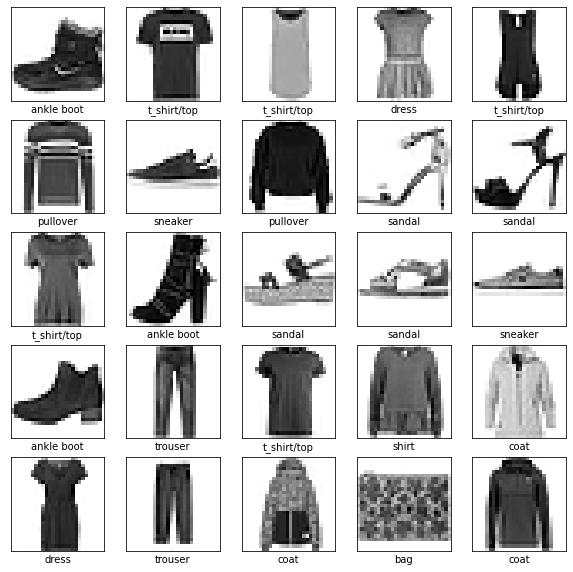

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid("off")
  plt.imshow(x_tr[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_tr[i]])

***model buliding***

In [ ]:
model=Sequential()

#layer 1: input layer 784 nodes
model.add(Flatten(input_shape=(28,28)))

#layer 2: hidden layer ,128 nodes
model.add(Dense(128))
model.add(Activation("relu"))

#layer 3:op layer, 10 nodes 
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

***train the model***

In [ ]:
model.fit(x_tr,y_tr,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4990 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3760 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3392 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8903


***Evaluate the model***

In [28]:
result=model.evaluate(x_te,y_te)

score=result[0]
accuracy=result[1]

print("score: ", score)
print("accuracy: ",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3551 - accuracy: 0.8723
score:  0.35510721802711487
accuracy:  0.8723000288009644


***prediction***

In [ ]:
pred=model.predict(x_te[0])
pred_class=model.predict_classes(x_te[0])

pred
pred_class

In [37]:
predictions=model.predict(x_te)
pred_classes=model.predict_classes(x_te)

print("predicted value:",pred_classes[0],"\n","true value: ",y_te[0])


predicted value: 9 
 true value:  9


test 25 img ,with predicted value,true value

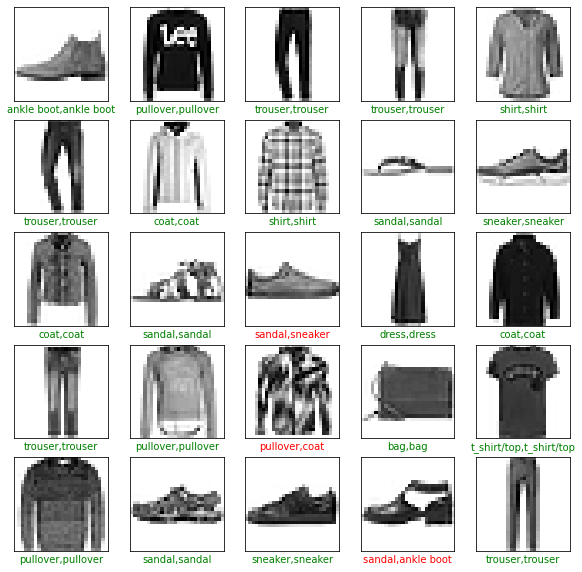

In [46]:
#prediction=true color=green
#else color=red

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid("off")
  plt.imshow(x_te[i],cmap=plt.cm.binary)
  
  pred_val=pred_classes[i]
  true_val=y_te[i]

  if pred_val==true_val:
    color='green'

  else:
    color="red"

  plt.xlabel(f"{class_names[pred_val]},{class_names[true_val]}",color=color)


***img for test***

In [47]:
img=x_te[0]

img.shape

(28, 28)

In [48]:
#add initial dimension

img=(np.expand_dims(img,0))

img.shape

(1, 28, 28)

In [50]:
pred=model.predict(img)
pred_class=model.predict_classes(img)

print(pred,"\n",pred_class)

[[3.5039880e-06 4.3197105e-08 5.7465229e-07 3.6875644e-08 1.1311071e-06
  2.8964686e-03 2.4541835e-06 4.3900684e-02 3.0111810e-06 9.5319211e-01]] 
 [9]
